<IPython.core.display.Javascript object>


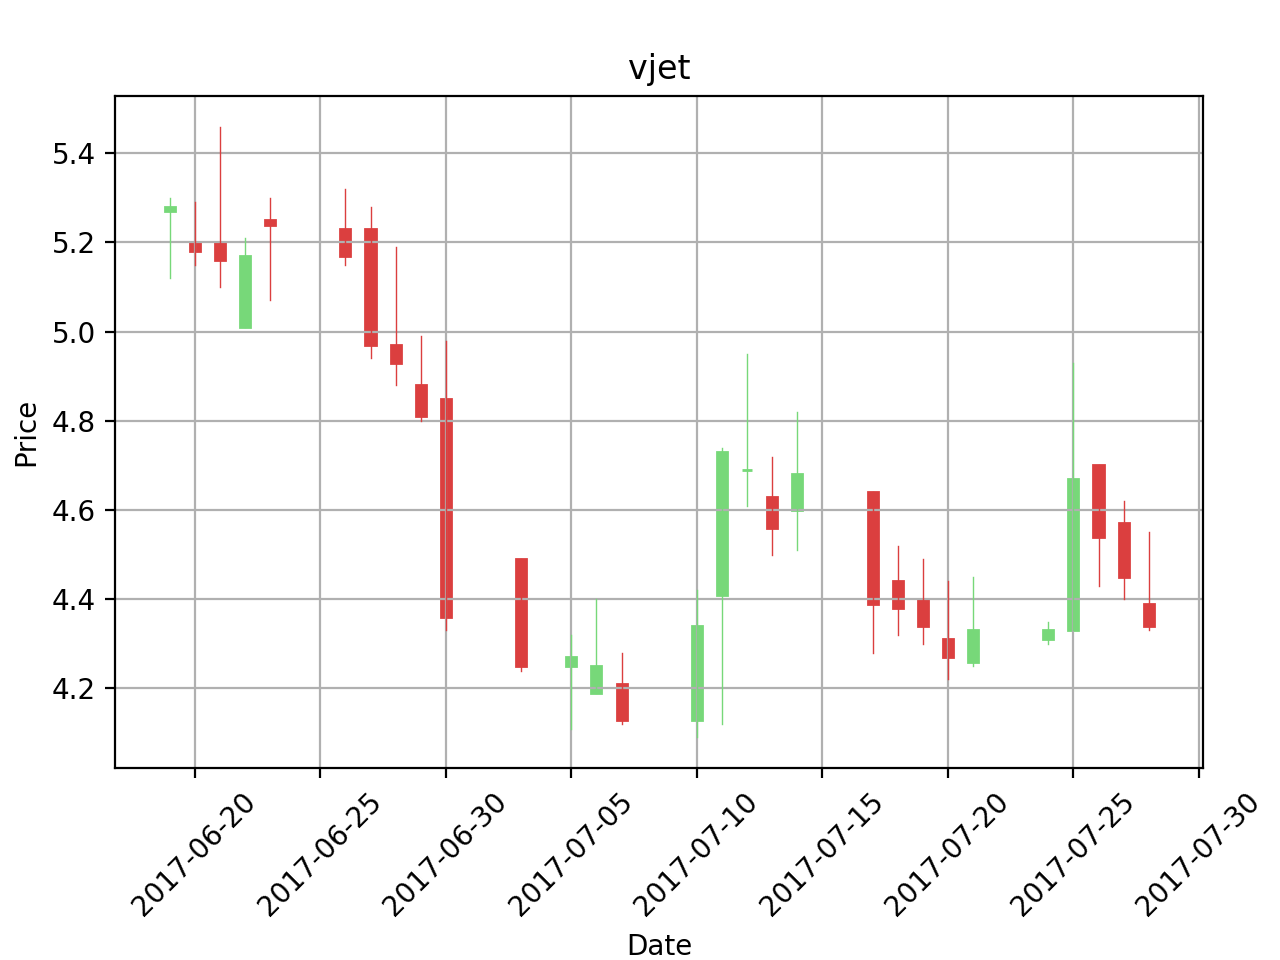

URL is: http://www.google.com/finance/historical?q=vjet&startdate=Jun+17%2C+2017&enddate=Jul+30%2C+2017&output=csv


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


#url = "https://raw.github.com/datasets/gdp/master/data/gdp.csv"

#datareader = csv.reader(io.TextIOWrapper(webpage))

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock,start,end):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    url= "http://www.google.com/finance/historical?q="+stock+"&startdate="+start+"&enddate="+end+"&output=csv"
    #url= "http://www.google.com/finance/historical?q="+stock+"&startdate=Apr+17%2C+2017&enddate=Jul+30%2C+2017&output=csv"
    source_code = urllib.request.urlopen(url).read().decode()
    
    print('URL is: '+url)

    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split()
        #print(split_line)
        if 'Volume' not in line:
            stock_data.append(line)


    date, openp, highp, lowp, closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%d-%b-%y')}) 

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x] # show date in xaxis
        #append_me = x, openp[x], highp[x], lowp[x], closep[x], volume[x] # show NUMBER 0,1,2... in xaxis
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # only use if you want to see dates
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10)) # only use if you want to see dates
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    
    
    
#graph_data('SYX','Jan+7%2C+2016','Dec+23%2C+2016')  
graph_data('vjet','Jun+17%2C+2017','Jul+30%2C+2017')
#graph_data('SYX')   

<IPython.core.display.Javascript object>


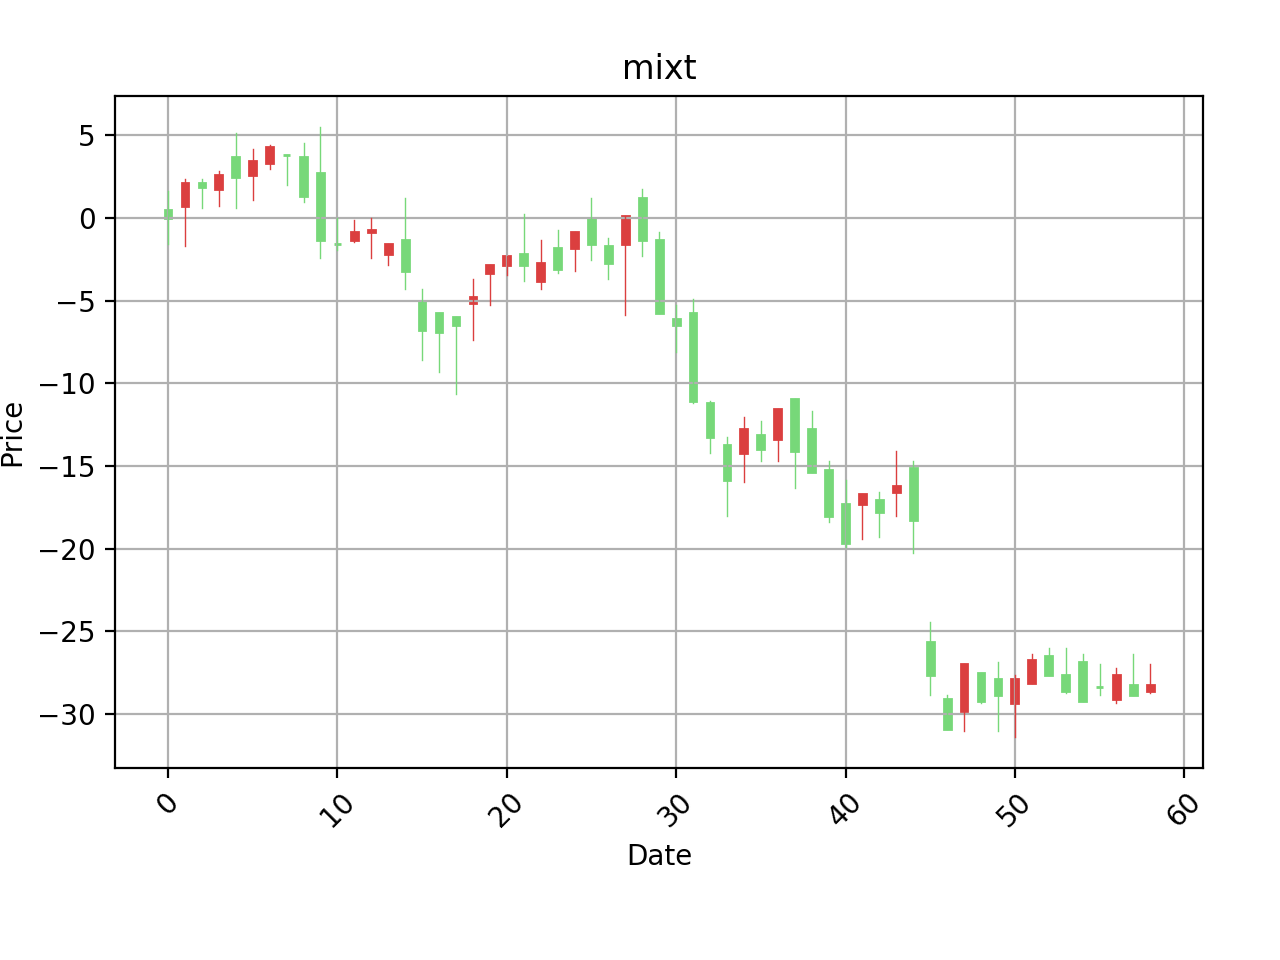

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [20]:
##### normalized candlesticks

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


#url = "https://raw.github.com/datasets/gdp/master/data/gdp.csv"

#datareader = csv.reader(io.TextIOWrapper(webpage))

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock,start,end):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    url= "http://www.google.com/finance/historical?q="+stock+"&startdate="+start+"&enddate="+end+"&output=csv"
    #url= "http://www.google.com/finance/historical?q="+stock+"&startdate=Apr+17%2C+2017&enddate=Jul+30%2C+2017&output=csv"
    source_code = urllib.request.urlopen(url).read().decode()
    
    #print('URL is: '+url)

    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split()
        #print(split_line)
        if 'Volume' not in line:
            stock_data.append(line)


    date, openp, highp, lowp, closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%d-%b-%y')}) 

    x = 0
    #y = len(date) # time since start
    y = 60
    ohlc = []

    while x < (y-1): # use -1 to take care of a blank candlestick at the end
        start_value = openp[0]
        open_norm = (openp[x] - start_value) / start_value * 100
        high_norm = (highp[x] - start_value) / start_value * 100
        low_norm = (lowp[x] - start_value) / start_value * 100
        close_norm = (closep[x] - start_value) / start_value * 100
        
        append_me = x, open_norm, high_norm, low_norm, close_norm, volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    
    
    
#graph_data('SYX','Jan+7%2C+2016','Dec+23%2C+2016')  
graph_data('mixt','Apr+17%2C+2017','Jul+30%2C+2017')
#graph_data('SYX')   

In [6]:
##### normalized candlesticks

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


#url = "https://raw.github.com/datasets/gdp/master/data/gdp.csv"

#datareader = csv.reader(io.TextIOWrapper(webpage))

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock,start,end):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    url= "http://www.google.com/finance/historical?q="+stock+"&startdate="+start+"&enddate="+end+"&output=csv"
    #url= "http://www.google.com/finance/historical?q="+stock+"&startdate=Apr+17%2C+2017&enddate=Jul+30%2C+2017&output=csv"
    source_code = urllib.request.urlopen(url).read().decode()
    
    #print('URL is: '+url)

    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split()
        print(split_line)
        if 'Volume' not in line:
            stock_data.append(line)


    date, openp, highp, lowp, closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%d-%b-%y')}) 

    x = 0
    #y = len(date) # time since start
    y = 60
    ohlc = []

    while x < (y-1): # use -1 to take care of a blank candlestick at the end
        start_value = openp[0]
        open_norm = (openp[x] - start_value) / start_value * 100
        high_norm = (highp[x] - start_value) / start_value * 100
        low_norm = (lowp[x] - start_value) / start_value * 100
        close_norm = (closep[x] - start_value) / start_value * 100
        
        append_me = x, open_norm, high_norm, low_norm, close_norm, volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    
    
    
#graph_data('SYX','Jan+7%2C+2016','Dec+23%2C+2016')  
graph_data('mixt','Apr+17%2C+2017','Jul+31%2C+2017')
#graph_data('SYX')   

<IPython.core.display.Javascript object>

['\ufeffDate,Open,High,Low,Close,Volume']
['31-Jul-17,-,8.22,-,8.14,294872']
['28-Jul-17,8.15,8.28,8.02,8.19,159226']
['27-Jul-17,8.32,8.34,8.01,8.21,106059']
['26-Jul-17,8.30,8.34,8.20,8.32,55986']
['25-Jul-17,8.36,8.38,8.21,8.29,55707']
['24-Jul-17,8.35,8.57,8.20,8.45,128968']
['21-Jul-17,8.43,8.49,8.24,8.36,20933']
['20-Jul-17,8.50,8.51,8.39,8.42,27447']
['19-Jul-17,8.46,8.46,8.31,8.46,63041']
['18-Jul-17,8.26,8.52,8.23,8.45,50325']
['17-Jul-17,8.04,8.60,7.95,8.37,176336']
['14-Jul-17,8.02,8.15,7.99,8.02,30897']
['13-Jul-17,8.08,8.14,8.03,8.04,29857']
['12-Jul-17,8.09,8.15,7.95,8.08,61000']
['11-Jul-17,8.02,8.02,7.92,7.97,117552']
['10-Jul-17,7.89,8.25,7.80,8.04,266281']
['7-Jul-17,7.60,7.80,7.45,7.74,152642']
['6-Jul-17,7.59,7.68,7.39,7.68,78512']
['5-Jul-17,7.62,7.66,7.28,7.66,150579']
['3-Jul-17,7.76,7.85,7.55,7.73,133081']
['30-Jun-17,7.92,7.92,7.72,7.88,28531']
['29-Jun-17,7.96,7.96,7.87,7.92,22218']
['28-Jun-17,7.92,8.17,7.84,7.97,16833']
['27-Jun-17,7.93,8.04,7.80,7.84,27106'

ValueError: could not convert string to float: b'-'